In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
# Implementation of the dropout-regression
# before dropout regression is shown and after applying dropout regression is applied and plotted
# Author: Muhammad Humayun Khan

import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,InputLayer,Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
# generate data
X_train = np.linspace(-1, 1, 20)

In [26]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [27]:
X_test = np.linspace(-1, 1, 20)

In [28]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

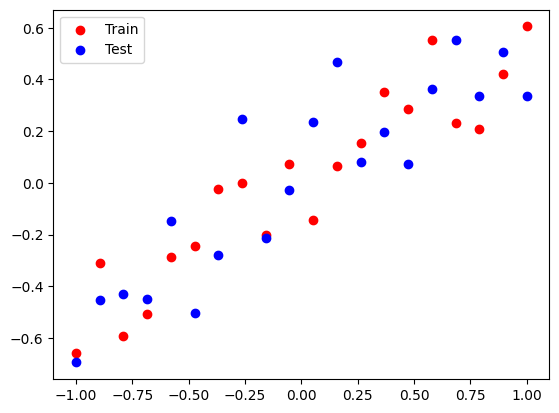

In [29]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [30]:
# Regression Model
model_regression = Sequential()

model_regression.add(InputLayer(shape = (1,)))
model_regression.add(Dense(128,activation="relu"))
model_regression.add(Dense(128, activation="relu"))
model_regression.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)

model_regression.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model_regression.fit(X_train, y_train, epochs=500,validation_data = (X_test, y_test),verbose=False)

In [31]:
# evaluate the model
_, train_mse = model_regression.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_regression.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

# difference between train and test

Train: 0.0023503017146140337, Test: 0.04474079981446266


In [32]:
y_pred_regression = model_regression.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


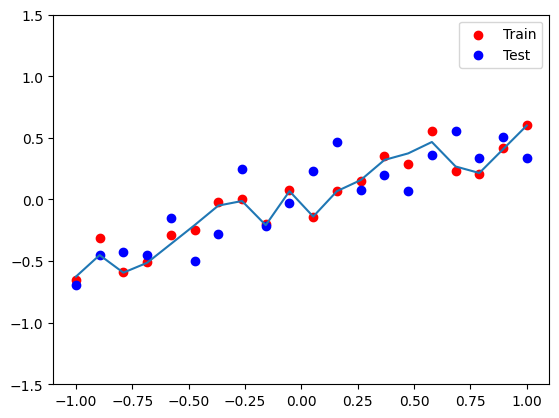

In [33]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_regression)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# the curve showing plotting the red dots alot

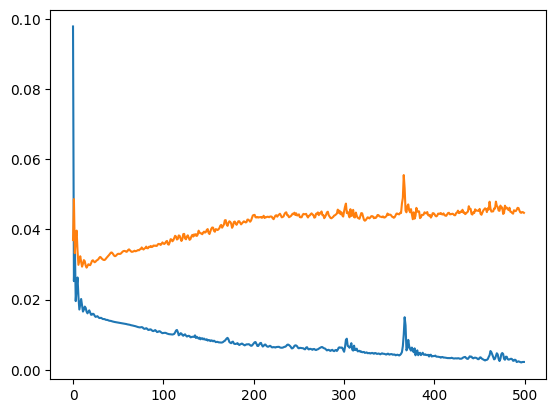

In [34]:
# another way of checking/tracking the curve data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [35]:
# Dropout Model
model_dropout = Sequential()

model_dropout.add(InputLayer(shape = (1,)))
model_dropout.add(Dense(128,activation="relu"))
model_dropout.add(Dropout(0.2))   # 20 percent dropouts in the layer
model_dropout.add(Dense(128, activation="relu"))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)

model_dropout.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_dropout.fit(X_train, y_train, epochs=500,validation_data = (X_test, y_test),verbose=False)

In [36]:
# evaluate the model
_, train_mse = model_dropout.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_dropout.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.013557860627770424, Test: 0.03790692239999771


In [37]:
y_pred_dropout = model_dropout.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


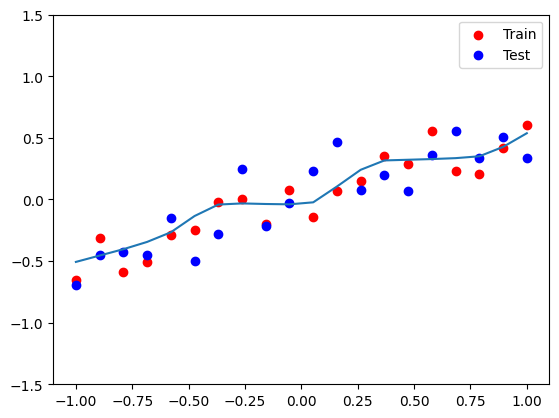

In [38]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_dropout)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

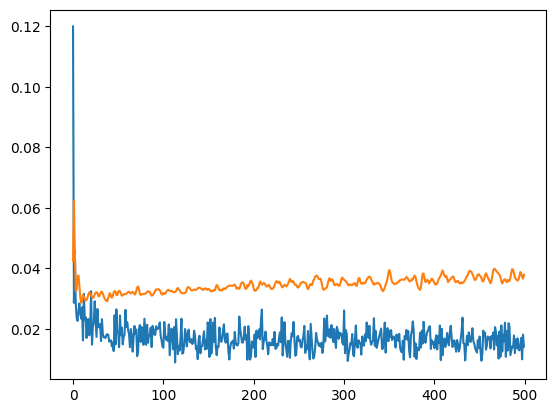

In [40]:
plt.plot(drop_out_history.history['loss'])
plt.plot(drop_out_history.history['val_loss'])